In [29]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [30]:
%load_ext blackcellmagic

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [31]:
#2018
from zipfile import ZipFile
directory_18 = r'F:\Ecobee\files\2018_sac'
df_sac_18_daily_peak = pd.DataFrame()
import datetime
for filename in os.listdir(directory_18):
    myzip = ZipFile(os.path.join(directory_18, filename))
    g = myzip.open(filename[:-4])
    df_temp = pd.read_csv(g, parse_dates=['DateTime'])
    df_temp1 = pd.get_dummies(df_temp, columns=['HvacMode'])
    df_temp1['Date'] = df_temp1['DateTime'].dt.date
    df_temp1['user_id'] = filename[:-8]
    df_temp1 = df_temp1[(df_temp1['DateTime'].dt.hour >= 17) &
                        (df_temp1['DateTime'].dt.hour < 20) &
                        (df_temp1['DateTime'].dt.month >= 6) &
                        (df_temp1['DateTime'].dt.month <=
                         9)]  #summer days only
    df_day = df_temp1.groupby([df_temp1['Date']]).agg(
        daily_total_heating=pd.NamedAgg(column='auxHeat1', aggfunc=sum),
        daily_total_cooling=pd.NamedAgg(column='compCool1', aggfunc=sum),
        user_id=pd.NamedAgg(column='user_id', aggfunc=min)).reset_index()
    df_day['daily_total_heating'] = df_day['daily_total_heating'] / 3600
    df_day['daily_total_cooling'] = df_day['daily_total_cooling'] / 3600
    df_sac_18_daily_peak = pd.concat([df_sac_18_daily_peak, df_day])
    g.close()
    myzip.close()

In [32]:
df_sac_18_daily_peak.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21215 entries, 0 to 121
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 21215 non-null  object 
 1   daily_total_heating  21215 non-null  float64
 2   daily_total_cooling  21215 non-null  float64
 3   user_id              21215 non-null  object 
dtypes: float64(2), object(2)
memory usage: 828.7+ KB


In [33]:
#2019
from zipfile import ZipFile
df_sac_19_daily_peak = pd.DataFrame()
directory_19 = r'F:\Ecobee\files\2019_sac'
import datetime
for filename in os.listdir(directory_19):
    myzip = ZipFile(os.path.join(directory_19, filename))
    f = myzip.open(filename[:-4])
    df_temp = pd.read_csv(f, parse_dates=['DateTime'])
    df_temp1 = pd.get_dummies(df_temp, columns=['HvacMode'])
    df_temp1['Date'] = df_temp1['DateTime'].dt.date
    df_temp1['user_id'] = filename[:-8]
    df_temp1 = df_temp1[(df_temp1['DateTime'].dt.hour >= 17) &
                        (df_temp1['DateTime'].dt.hour < 20) &
                        (df_temp1['DateTime'].dt.month >= 6) &
                        (df_temp1['DateTime'].dt.month <=
                         9)]  #summer days only
    df_day = df_temp1.groupby([df_temp1['Date']]).agg(
        daily_total_heating=pd.NamedAgg(column='auxHeat1', aggfunc=sum),
        daily_total_cooling=pd.NamedAgg(column='compCool1', aggfunc=sum),
        user_id=pd.NamedAgg(column='user_id', aggfunc=min)).reset_index()
    df_day['daily_total_heating'] = df_day['daily_total_heating'] / 3600
    df_day['daily_total_cooling'] = df_day['daily_total_cooling'] / 3600
    df_sac_19_daily_peak = pd.concat([df_sac_19_daily_peak, df_day])
    f.close()
    myzip.close()

In [34]:
df_sac_19_daily_peak.head()
#note there is a "time jump" from 2019-07-25 16:55 to 2019-07-26 17:00

,Date,daily_total_heating,daily_total_cooling,user_id
0,2019-06-01,0.0,1.937500,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
1,2019-06-02,0.0,1.095833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
2,2019-06-03,0.0,0.945833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
3,2019-06-04,0.0,2.187500,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
4,2019-06-05,0.0,1.791667,0038e4cc0089e5a289601a79af4b6c6f2c9efc97


In [35]:
df_sac_18n19_daily_peak=pd.concat([df_sac_18_daily_peak,df_sac_19_daily_peak])
df_sac_18n19_daily_peak.head()

,Date,daily_total_heating,daily_total_cooling,user_id
0,2018-06-01,0.0,0.116667,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
1,2018-06-02,0.0,1.050000,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
2,2018-06-03,0.0,1.941667,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
3,2018-06-04,0.0,0.820833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97
4,2018-06-05,0.0,0.000000,0038e4cc0089e5a289601a79af4b6c6f2c9efc97


In [36]:
df_sac_18n19_daily_peak['count'] = df_sac_18n19_daily_peak.groupby('user_id')['user_id'].transform('count')
df_sac_18n19_daily_peak['count'].value_counts().head(10)

243    28431
121    19481
241     2169
242     1452
223     1115
239      717
237      711
235      470
117      468
231      462
Name: count, dtype: int64

In [37]:
df_sac_18n19_daily_peak.head()

,Date,daily_total_heating,daily_total_cooling,user_id,count
0,2018-06-01,0.0,0.116667,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243
1,2018-06-02,0.0,1.050000,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243
2,2018-06-03,0.0,1.941667,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243
3,2018-06-04,0.0,0.820833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243
4,2018-06-05,0.0,0.000000,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243


In [38]:
df_sac_18n19_daily_peak=df_sac_18n19_daily_peak[df_sac_18n19_daily_peak['count']==243]
df_sac_18n19_daily_peak['Date']=pd.to_datetime(df_sac_18n19_daily_peak['Date'])
df_sac_18n19_daily_peak.head()

,Date,daily_total_heating,daily_total_cooling,user_id,count
0,2018-06-01,0.0,0.116667,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243
1,2018-06-02,0.0,1.050000,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243
2,2018-06-03,0.0,1.941667,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243
3,2018-06-04,0.0,0.820833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243
4,2018-06-05,0.0,0.000000,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243


In [39]:
df_temperature=pd.read_csv(r'F:\Ecobee\smf_temp_18and19.csv', parse_dates=['DATE'])
df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  730 non-null    object        
 1   NAME     730 non-null    object        
 2   DATE     730 non-null    datetime64[ns]
 3   TAVG     730 non-null    int64         
 4   TMAX     730 non-null    int64         
 5   TMIN     730 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 34.3+ KB


In [40]:
df_temperature.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-01,49,65,38
1,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-02,48,59,39
2,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-03,50,57,40
3,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-04,55,65,49
4,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-01-05,55,60,50


In [41]:
df_sac_18n19_daily_peak_w_temperature=pd.merge(df_sac_18n19_daily_peak,df_temperature,how='left', left_on='Date', right_on='DATE')
df_sac_18n19_daily_peak_w_temperature.head()

,Date,daily_total_heating,daily_total_cooling,user_id,count,STATION,NAME,DATE,TAVG,TMAX,TMIN
0,2018-06-01,0.0,0.116667,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-01,65,86,49
1,2018-06-02,0.0,1.050000,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-02,74,96,55
2,2018-06-03,0.0,1.941667,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-03,78,98,58
3,2018-06-04,0.0,0.820833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-04,76,89,58
4,2018-06-05,0.0,0.000000,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-05,67,84,53


In [42]:
df_sac_18n19_daily_peak_w_temperature[
    'TAVG_less_62'] = df_sac_18n19_daily_peak_w_temperature['TAVG'] - 62
df_sac_18n19_daily_peak_w_temperature['TAVG_less_62'] = df_sac_18n19_daily_peak_w_temperature['TAVG_less_62'].apply(lambda x : x if x > 0 else 0)

In [43]:
df_sac_18n19_daily_peak_w_temperature['y2019']=np.where(df_sac_18n19_daily_peak_w_temperature['Date'].dt.year== 2019, 1, 0)
# [df_sac_18n19_daily_peak_w_temperature['Date'].dt.year==2019]
df_sac_18n19_daily_peak_w_temperature.describe()

,daily_total_heating,daily_total_cooling,count,TAVG,TMAX,TMIN,TAVG_less_62,y2019
count,28431.000000,28431.000000,28431.0,28431.000000,28431.000000,28431.000000,28431.000000,28431.000000
mean,0.000005,0.941740,243.0,72.703704,90.349794,58.473251,10.740741,0.497942
std,0.000564,0.923302,0.0,5.165131,7.219576,3.977670,5.074298,0.500005
min,0.000000,0.000000,243.0,58.000000,69.000000,45.000000,0.000000,0.000000
25%,0.000000,0.000000,243.0,69.000000,86.000000,56.000000,7.000000,0.000000
50%,0.000000,0.766667,243.0,73.000000,91.000000,58.000000,11.000000,0.000000
75%,0.000000,1.587500,243.0,76.000000,96.000000,61.000000,14.000000,1.000000
max,0.083333,3.000000,243.0,86.000000,105.000000,69.000000,24.000000,1.000000


In [44]:
df_sac_18n19_daily_peak_w_temperature[
    'interaction'] = df_sac_18n19_daily_peak_w_temperature[
        'TAVG_less_62'] * df_sac_18n19_daily_peak_w_temperature['y2019']

In [45]:
import statsmodels.api as sm


def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit(cov_type='HC1')
    return result.params


#This is what you need
results=df_sac_18n19_daily_peak_w_temperature.groupby('user_id').apply(
    regress, 'daily_total_cooling', ['TAVG_less_62','interaction']).reset_index()
results.head(10)

,user_id,TAVG_less_62,interaction,intercept
0,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,0.099721,-0.037116,-0.026744
1,00e2f68ec737f7480114a67bbef7c5f65b6b8516,0.126893,-0.004936,-0.330779
2,01479a9a84e1722791f2b440f6d4f14f51025499,0.058301,-0.012130,0.249429
3,0150a428f7cc891b6a69cb7db390869c96a24f1d,0.055212,0.001141,-0.000574
4,0614c5d47de23d61b21be2141907668a54bf45a0,0.050523,0.036591,0.240218
5,06d89337caa78e3ed6e3591c9e22b8808a82c327,0.154909,0.011553,-0.430685
6,0773f65bc76833bddd55f0f850ded5d14bc8ab99,0.057211,0.001333,-0.145673
7,084a2b8c0522a36209d062d852d04bb64494ea84,0.071982,0.026287,0.121161
8,0aec426e98899420452f505669f36b1f47651c68,0.109897,-0.043804,-0.160636
9,0f50223ca3a7c1def87d95d3696719692d5d3d33,0.080221,-0.011740,0.031333


In [46]:
# creat temperature bins
df_sac_18n19_daily_peak_w_temperature["temp_bins"] = pd.cut(
    df_sac_18n19_daily_peak_w_temperature["TAVG"],
    bins=[57, 62, 66, 70, 74, 78, 82, 86],
    right=True,
)
df_sac_18n19_daily_peak_w_temperature["coded_bins"] = pd.cut(
    df_sac_18n19_daily_peak_w_temperature["TAVG"],
    bins=[57, 62, 66, 70, 74, 78, 82, 86],
    right=True,
    labels=['1', '2', '3', '4', '5', '6', '7']
)

In [47]:
df_sac_18n19_daily_peak_w_temperature.head()

,Date,daily_total_heating,daily_total_cooling,user_id,count,STATION,NAME,DATE,TAVG,TMAX,TMIN,TAVG_less_62,y2019,interaction,temp_bins,coded_bins
0,2018-06-01,0.0,0.116667,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-01,65,86,49,3,0,0,"(62, 66]",2
1,2018-06-02,0.0,1.050000,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-02,74,96,55,12,0,0,"(70, 74]",4
2,2018-06-03,0.0,1.941667,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-03,78,98,58,16,0,0,"(74, 78]",5
3,2018-06-04,0.0,0.820833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-04,76,89,58,14,0,0,"(74, 78]",5
4,2018-06-05,0.0,0.000000,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-05,67,84,53,5,0,0,"(66, 70]",3


In [48]:
list_of_temp_bins=df_sac_18n19_daily_peak_w_temperature["temp_bins"].unique()
# list_of_temp_bins=list_of_temp_bins.tolist()
# list_of_temp_bins.sort()
list_of_temp_bins

[(62, 66], (70, 74], (74, 78], (66, 70], (57, 62], (82, 86], (78, 82]]
Categories (7, interval[int64]): [(57, 62] < (62, 66] < (66, 70] < (70, 74] < (74, 78] < (78, 82] < (82, 86]]

In [49]:
list_of_coded_bins=df_sac_18n19_daily_peak_w_temperature["coded_bins"].unique()
print(type(list_of_coded_bins))
list_of_coded_bins

<class 'pandas.core.arrays.categorical.Categorical'>


['2', '4', '5', '3', '1', '7', '6']
Categories (7, object): ['1' < '2' < '3' < '4' < '5' < '6' < '7']

In [50]:
list_of_coded_bins=list_of_coded_bins.tolist()
list_of_coded_bins.sort()
list_of_coded_bins

['1', '2', '3', '4', '5', '6', '7']

In [51]:
df_sac_18n19_daily_peak_w_temperature["const"] = 1
list_of_results=[]
for coded_bin in list_of_coded_bins:
    reg_data = df_sac_18n19_daily_peak_w_temperature[
        df_sac_18n19_daily_peak_w_temperature["coded_bins"] == coded_bin]
    current_reg=sm.OLS(endog=reg_data['daily_total_cooling'], \
              exog=reg_data[['TAVG_less_62','interaction','const']], \
                missing='drop')
    current_regresult =  current_reg.fit()#fit(cov_type='HC1')
    print('Results for Bin '+str(coded_bin)*20)
    print('\n')
    print(current_regresult.summary())
    print('\n')
    print('\n')
    list_of_results.append(current_regresult)

Results for Bin 11111111111111111111


                             OLS Regression Results                            
Dep. Variable:     daily_total_cooling   R-squared:                      -0.000
Model:                             OLS   Adj. R-squared:                 -0.000
Method:                  Least Squares   F-statistic:                       nan
Date:                 Thu, 22 Apr 2021   Prob (F-statistic):                nan
Time:                         17:03:19   Log-Likelihood:                -146.66
No. Observations:                  468   AIC:                             295.3
Df Residuals:                      467   BIC:                             299.5
Df Model:                            0                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [52]:
interaction_coeffs = []
for i in range(7):
    interaction_coeffs.append(list_of_results[i].params[1])
print(interaction_coeffs)
interaction_coeff_se = []
for i in range(7):
    interaction_coeff_se.append(list_of_results[i].bse[1])
print(interaction_coeff_se)
interaction_coeffs_plusSE = [
    a + b for a, b in zip(interaction_coeffs, interaction_coeff_se)
]
print(interaction_coeffs_plusSE)
interaction_coeffs_minusSE = [
    a - b for a, b in zip(interaction_coeffs, interaction_coeff_se)
]
print(interaction_coeffs_minusSE)

[0.0, 0.010270931167974673, -0.01895971033328104, -0.008377322891894263, -0.014335750725334502, 0.0033953841104323907, 0.005123580123579564]
[0.0, 0.00737408006959355, 0.002818737125565598, 0.0017873917374096689, 0.0015749253782816998, 0.0020605395099252666, 0.005483132885989114]
[0.0, 0.017645011237568224, -0.01614097320771544, -0.006589931154484594, -0.012760825347052803, 0.005455923620357657, 0.010606713009568678]
[0.0, 0.0028968510983811225, -0.021778447458846637, -0.010164714629303932, -0.0159106761036162, 0.001334844600507124, -0.0003595527624095495]


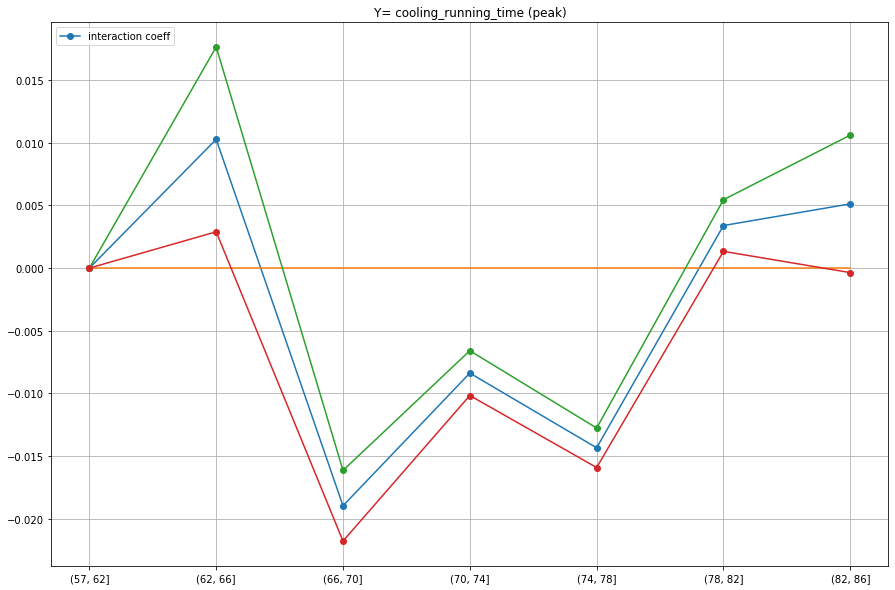

[0.0, 0.00737408006959355, 0.002818737125565598, 0.0017873917374096689, 0.0015749253782816998, 0.0020605395099252666, 0.005483132885989114]
[0.0, 0.017645011237568224, -0.01614097320771544, -0.006589931154484594, -0.012760825347052803, 0.005455923620357657, 0.010606713009568678]
[0.0, 0.0028968510983811225, -0.021778447458846637, -0.010164714629303932, -0.0159106761036162, 0.001334844600507124, -0.0003595527624095495]


In [53]:
# x axis range
x = range(len(interaction_coeffs))
plt.figure(figsize=(15,10))
# y
plt.plot(x,interaction_coeffs,'o-', label='interaction coeff')
plt.plot(x,[0] * len(interaction_coeffs))
plt.legend(loc="upper left")
plt.plot(x,interaction_coeffs_plusSE,'o-', label='upper bound')
plt.plot(x,interaction_coeffs_minusSE,'o-', label='lower bound')
plt.xticks(x,('(57, 62]', '(62, 66]', '(66, 70]', '(70, 74]', '(74, 78]', '(78, 82]',  '(82, 86]') )
plt.grid()
plt.title("Y= cooling_running_time (peak)")
plt.show()
interaction_coeff_se=[]
for i in range(7):
    interaction_coeff_se.append(list_of_results[i].bse[1])
print(interaction_coeff_se)
interaction_coeffs_plusSE= [a + b for a, b in zip(interaction_coeffs, interaction_coeff_se)]
print(interaction_coeffs_plusSE)
interaction_coeffs_minusSE=[a - b for a, b in zip(interaction_coeffs, interaction_coeff_se)]
print(interaction_coeffs_minusSE)

when T>78, not significant, no room to reduce cooling time
might achieve less cooling be setting higher set_point for cooling

In [54]:
df_sac_18n19_daily_peak_w_temperature.head()

,Date,daily_total_heating,daily_total_cooling,user_id,count,STATION,NAME,DATE,TAVG,TMAX,TMIN,TAVG_less_62,y2019,interaction,temp_bins,coded_bins,const
0,2018-06-01,0.0,0.116667,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-01,65,86,49,3,0,0,"(62, 66]",2,1
1,2018-06-02,0.0,1.050000,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-02,74,96,55,12,0,0,"(70, 74]",4,1
2,2018-06-03,0.0,1.941667,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-03,78,98,58,16,0,0,"(74, 78]",5,1
3,2018-06-04,0.0,0.820833,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-04,76,89,58,14,0,0,"(74, 78]",5,1
4,2018-06-05,0.0,0.000000,0038e4cc0089e5a289601a79af4b6c6f2c9efc97,243,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",2018-06-05,67,84,53,5,0,0,"(66, 70]",3,1


In [154]:
avg_runtime_by_bins=df_sac_18n19_daily_peak_w_temperature.groupby(by=['coded_bins','y2019']).agg(
    block_total_cool_in_h=pd.NamedAgg(column='daily_total_cooling', aggfunc=np.mean)).reset_index()
avg_runtime_by_bins['block_avg_hourly_coolTime']=avg_runtime_by_bins['block_total_cool_in_h']/3

In [155]:
avg_runtime_by_bins[avg_runtime_by_bins['y2019']==0].head(10)

,coded_bins,y2019,block_total_cool_in_h,block_avg_hourly_coolTime
0,1,0,0.291524,0.097175
2,2,0,0.313319,0.104440
4,3,0,0.614077,0.204692
6,4,0,1.005177,0.335059
8,5,0,1.430372,0.476791
10,6,0,1.300502,0.433501
12,7,0,1.601318,0.533773


In [156]:
avg_runtime_by_bins[avg_runtime_by_bins['y2019']==1].head(10)

,coded_bins,y2019,block_total_cool_in_h,block_avg_hourly_coolTime
1,1,1,0.022697,0.007566
3,2,1,0.366328,0.122109
5,3,1,0.557538,0.185846
7,4,1,0.930089,0.310030
9,5,1,1.205564,0.401855
11,6,1,1.372510,0.457503
13,7,1,1.751738,0.583913


In [157]:
avg_runtime_by_bins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   coded_bins                 14 non-null     category
 1   y2019                      14 non-null     int64   
 2   block_total_cool_in_h      14 non-null     float64 
 3   block_avg_hourly_coolTime  14 non-null     float64 
dtypes: category(1), float64(2), int64(1)
memory usage: 854.0 bytes


In [158]:
avg_runtime_by_bins=avg_runtime_by_bins.sort_values(by=['y2019', 'coded_bins'])
avg_runtime_by_bins

,coded_bins,y2019,block_total_cool_in_h,block_avg_hourly_coolTime
0,1,0,0.291524,0.097175
2,2,0,0.313319,0.104440
4,3,0,0.614077,0.204692
6,4,0,1.005177,0.335059
8,5,0,1.430372,0.476791
10,6,0,1.300502,0.433501
12,7,0,1.601318,0.533773
1,1,1,0.022697,0.007566
3,2,1,0.366328,0.122109
5,3,1,0.557538,0.185846


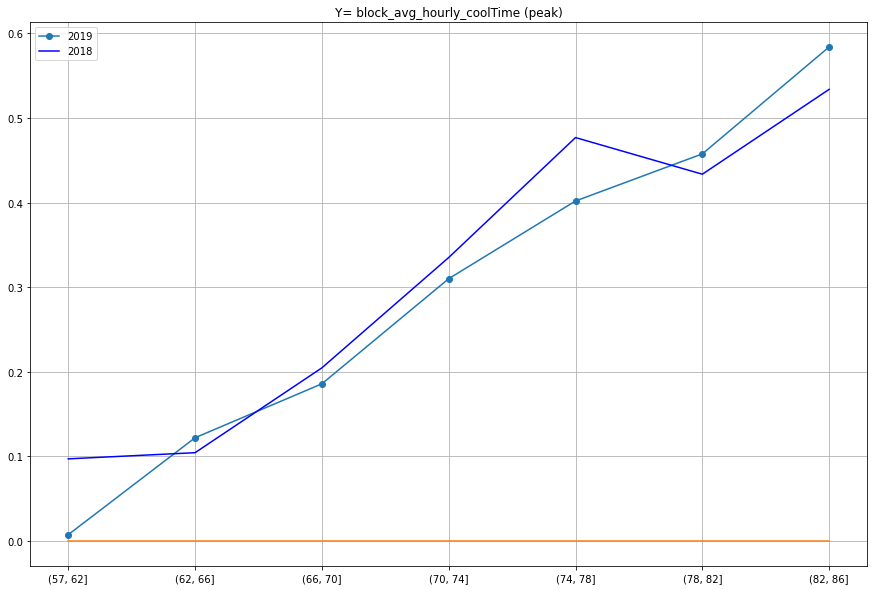

In [159]:
# x axis range
# x = range(len(avg_runtime_by_bins))
plt.figure(figsize=(15,10))
plot_2018=avg_runtime_by_bins[avg_runtime_by_bins['y2019']==0]
plot_2019=avg_runtime_by_bins[avg_runtime_by_bins['y2019']==1]

# y
plt.plot(plot_2019['coded_bins'],plot_2019['block_avg_hourly_coolTime'],'o-', label='2019')
plt.plot(plot_2018['coded_bins'],plot_2018['block_avg_hourly_coolTime'],'b-', label='2018')
plt.plot(x,[0] * len(plot_2019))
plt.legend(loc="upper left")
plt.xticks(plot_2019['coded_bins'],('(57, 62]', '(62, 66]', '(66, 70]', '(70, 74]', '(74, 78]', '(78, 82]',  '(82, 86]') )
plt.grid()
plt.title("Y= block_avg_hourly_coolTime (peak)")
plt.show()

In [160]:
avg_runtime_by_bins['y2019']=np.where(avg_runtime_by_bins['y2019']==1, 'year19','year18')
avg_runtime_by_bins

,coded_bins,y2019,block_total_cool_in_h,block_avg_hourly_coolTime
0,1,year18,0.291524,0.097175
2,2,year18,0.313319,0.104440
4,3,year18,0.614077,0.204692
6,4,year18,1.005177,0.335059
8,5,year18,1.430372,0.476791
10,6,year18,1.300502,0.433501
12,7,year18,1.601318,0.533773
1,1,year19,0.022697,0.007566
3,2,year19,0.366328,0.122109
5,3,year19,0.557538,0.185846


In [161]:
diff_avg_19_18=avg_runtime_by_bins.pivot(index='coded_bins', columns='y2019', values='block_avg_hourly_coolTime').reset_index()
# diff_avg_19_18=diff_avg_19_18[['coded_bins','2018','2019']]


In [164]:
diff_avg_19_18

y2019,coded_bins,year18,year19
0,1,0.097175,0.007566
1,2,0.104440,0.122109
2,3,0.204692,0.185846
3,4,0.335059,0.310030
4,5,0.476791,0.401855
5,6,0.433501,0.457503
6,7,0.533773,0.583913


In [165]:
diff_avg_19_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   coded_bins  7 non-null      category
 1   year18      7 non-null      float64 
 2   year19      7 non-null      float64 
dtypes: category(1), float64(2)
memory usage: 623.0 bytes


In [166]:
diff_avg_19_18['diff']=diff_avg_19_18['year19']-diff_avg_19_18['year18']
diff_avg_19_18

y2019,coded_bins,year18,year19,diff
0,1,0.097175,0.007566,-0.089609
1,2,0.104440,0.122109,0.017670
2,3,0.204692,0.185846,-0.018846
3,4,0.335059,0.310030,-0.025029
4,5,0.476791,0.401855,-0.074936
5,6,0.433501,0.457503,0.024003
6,7,0.533773,0.583913,0.050140


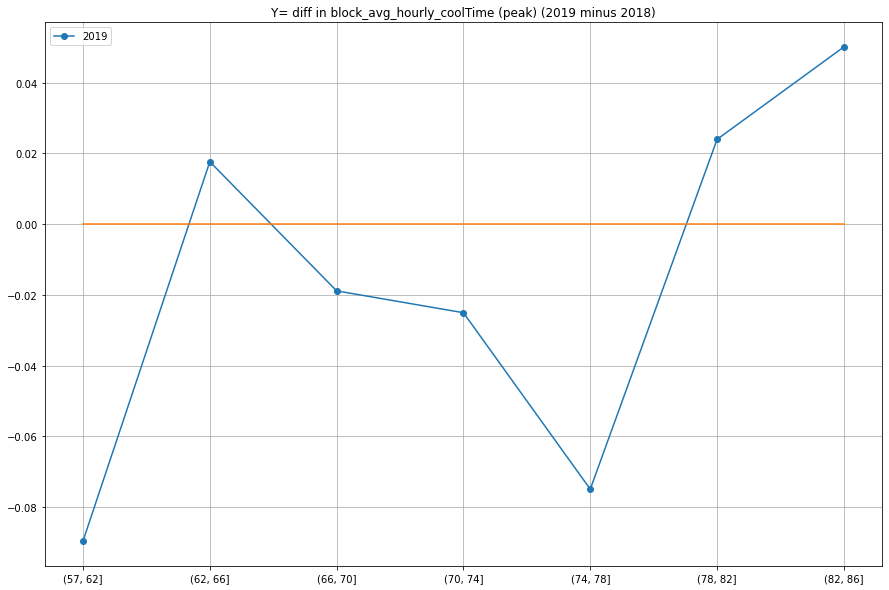

In [167]:
plt.figure(figsize=(15,10))

# y
plt.plot(diff_avg_19_18['coded_bins'],diff_avg_19_18['diff'],'o-', label='2019')
plt.plot(x,[0] * len(diff_avg_19_18))
plt.legend(loc="upper left")
plt.xticks(diff_avg_19_18['coded_bins'],('(57, 62]', '(62, 66]', '(66, 70]', '(70, 74]', '(74, 78]', '(78, 82]',  '(82, 86]') )
plt.grid()
plt.title("Y= diff in block_avg_hourly_coolTime (peak) (2019 minus 2018)")
plt.show()